In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Make Some 3D Data

In [2]:
np.random.seed(44)
centroids = np.array([[0, 0, 0], 
                      [1, 0, 0], 
                      [0, 1, 0], 
                      [0, 0, 1]]).T*10
clusters = np.random.randn(100, 3, 4)+centroids

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


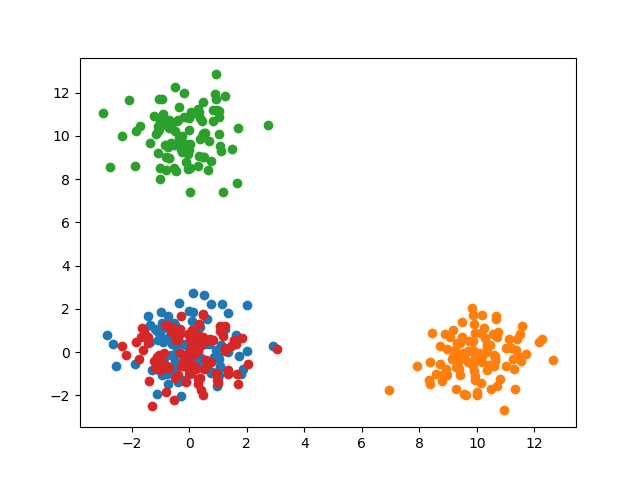

<IPython.core.display.Javascript object>


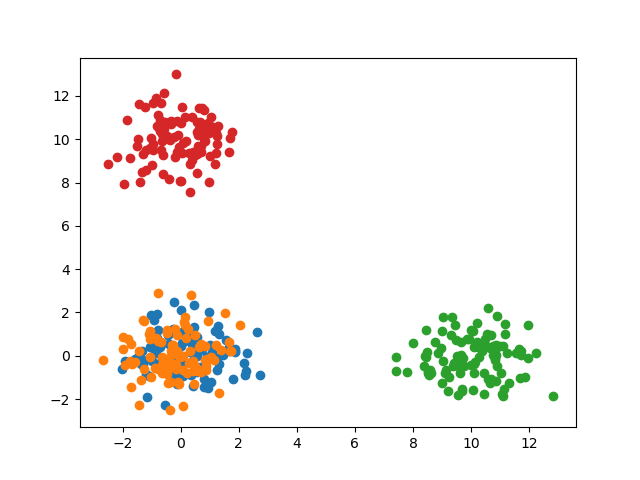

<IPython.core.display.Javascript object>


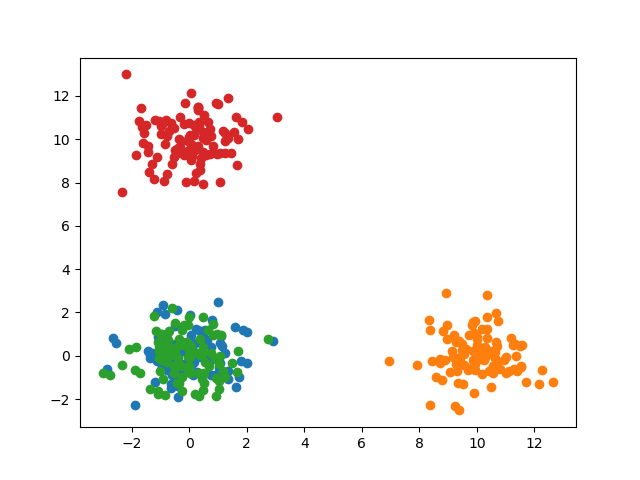

In [3]:
%pylab notebook
plt.figure()
for i in range(4):
    plt.scatter(clusters[:, 0, i], clusters[:, 1, i])
    
plt.figure()
for i in range(4):
    plt.scatter(clusters[:, 1, i], clusters[:, 2, i])
    
plt.figure()
for i in range(4):
    plt.scatter(clusters[:, 0, i], clusters[:, 2, i])

# It's Hard to Look at This Data in 2D

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
(3, 400)


<IPython.core.display.Javascript object>


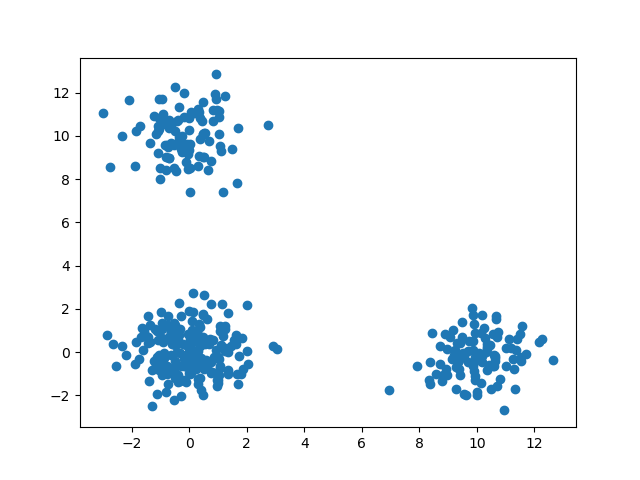

In [4]:
%pylab notebook
data = np.concatenate(clusters, axis=1)
print(data.shape)
plt.figure()
plt.scatter(data[0], data[1])

# Using 3D Plots, We Can Find a 2D Projection That Better Visualizes The Data

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


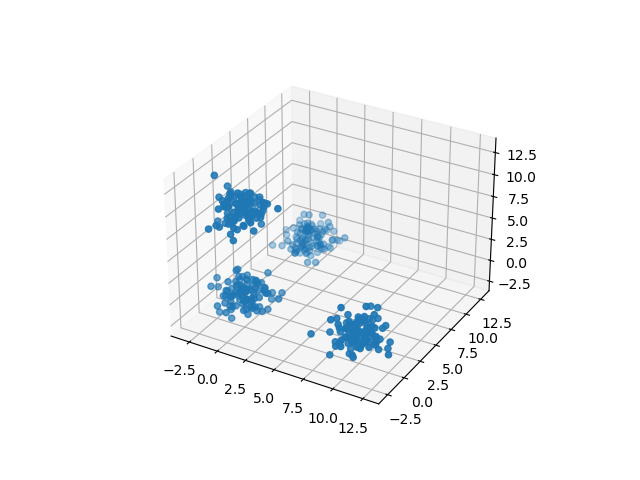

In [5]:
%pylab notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0], data[1], data[2])

In [6]:
data[0].std()

4.485389760073271

## Standard Deviation and Variance

$$Var = \sigma^{2}$$

$$\sigma^{2} = \frac{1}{N} \sum_{i=1}^{N} (x_{i} - \mu)^{2}$$

In [7]:
def std(data):
    var = 1/len(data)*((data-data.mean())**2).sum()
    return np.sqrt(var)
std(data[0])

4.485389760073271

## Covariance

$$\sigma^{2}_{ab} = \frac{1}{N} \sum_{i=1}^{N} (x_{a,i} - \mu_{a})(x_{b,i} - \mu_{b})$$

In [8]:
def covar(data1, data2):
    return  1/len(data1) * ((data1-data1.mean())*(data2-data2.mean())).sum()

In [9]:
covar(data[0], data[1])

-7.036565487470516

## Covariance Matrix

\begin{bmatrix}
\sigma^{2}_{11} & \sigma^{2}_{12} & \sigma^{2}_{13}\\ 
\sigma^{2}_{21} & \sigma^{2}_{22} & \sigma^{2}_{23}\\ 
\sigma^{2}_{21}& \sigma^{2}_{32} & \sigma^{2}_{33}
\end{bmatrix}

In [10]:
def covar_matrix(data):
    
    matrix = np.empty((data.shape[0], data.shape[0]))
    for i, d1 in enumerate(data):
        for j, d2 in enumerate(data):
            matrix[i, j] = covar(d1, d2)
            
    return matrix

In [11]:
cov_mat = covar_matrix(data)

\begin{equation}
\begin{bmatrix}
A & 0 & 0\\ 
0 & B & 0\\ 
0 & 0 & C
\end{bmatrix} 
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} = 
\begin{bmatrix}
AX \\ 
BY\\ 
CZ
\end{bmatrix}
\end{equation}

## Eigenvalues and Eigenvectors

$$A \vec{v} = \lambda \vec{v}$$

$$|A - \lambda I| = 0$$

In [12]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print(eigen_values)
eigen_vectors

[ 6.69396775 27.1630732  25.81385835]


array([[ 0.56965464,  0.61444728, -0.54584625],
       [ 0.58752501, -0.76885731, -0.25233469],
       [ 0.57472424,  0.1769547 ,  0.79898628]])

## Rotate Data Vectors into Maximum Variance (Matrix Diagonals) using Eigenvectors

In [13]:
proj1 = np.array([(d*eigen_vectors[0]).sum() for d in data.T])
proj2 = np.array([(d*eigen_vectors[1]).sum() for d in data.T])
proj3 = np.array([(d*eigen_vectors[2]).sum() for d in data.T])

## Find the projections that describe the most variance

In [14]:
print(proj1.std())
print(proj2.std())
print(proj3.std())

4.820325804210698
5.060823468489134
3.2898973022080678


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/jobrien/.conda/envs/tardis/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<IPython.core.display.Javascript object>


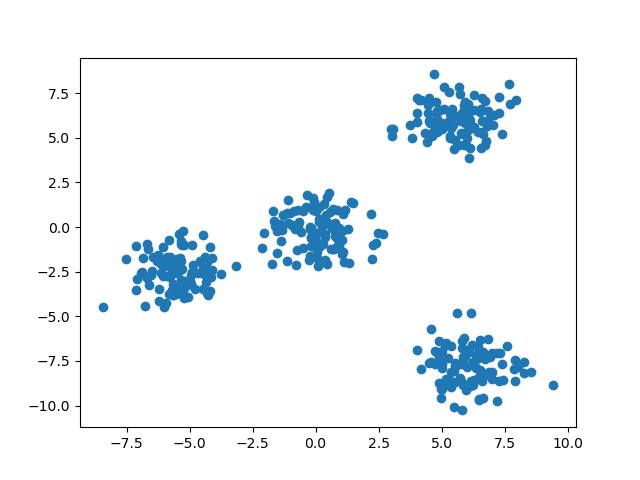

In [15]:
%pylab notebook

plt.figure()
plt.scatter(proj1, proj2)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


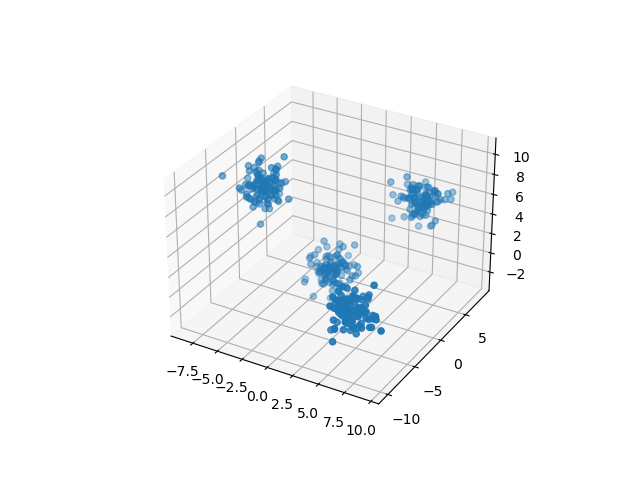

In [16]:
%pylab notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj1, proj2, proj3)